# The Sparks Foundation


# Author: Vibhuti Mayekar

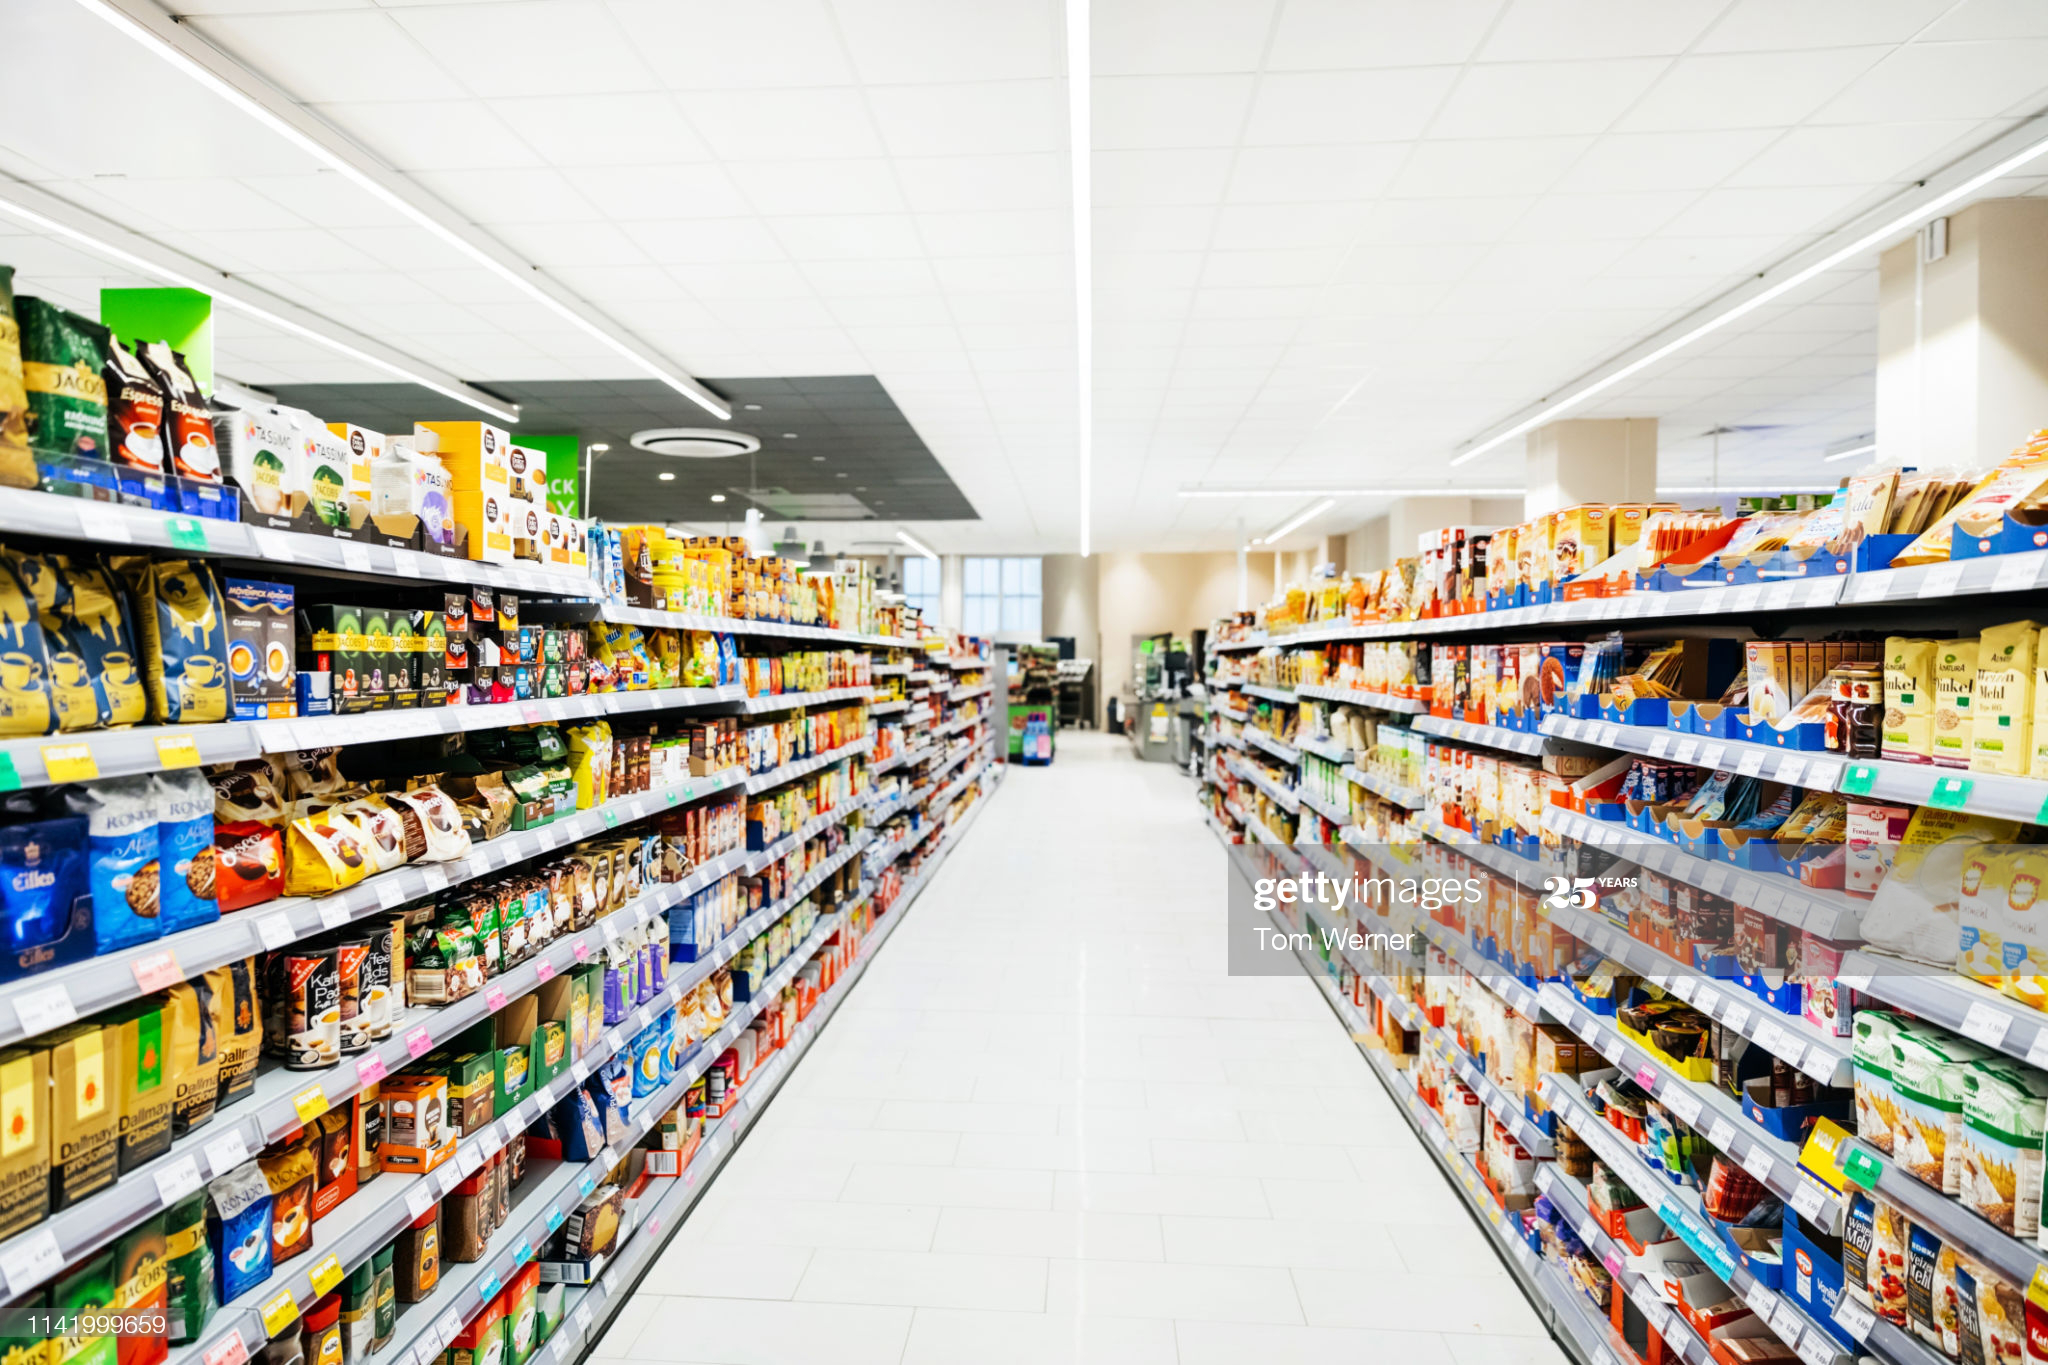

In [22]:
from PIL import Image 
im = Image.open(r"F:\\Vibhuti\\business analytics and intelligence\\Internshala\\internshipwork_grip\\superstore1.jpg") 
im

# Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.image as mpimg 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
os.chdir("F:\\Vibhuti\\business analytics and intelligence\\Internshala\\internshipwork_grip")
df = pd.read_csv('SampleSuperstore.csv')
df.head(5)

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [3]:
df.shape

(9994, 13)

In [2]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

We will compare all the variables with each other and also with the target variable:
Ship Mode
1. Ship Mode with Segment
2. Ship mode with City, State, Postal Code, Region
3. Shipmode with Category and Sub category
4. Ship mode with Sales
5. Ship mode with Quantity
5. Ship mode with Discount
6. Ship mode with Profit

Segment
1. Segment with City, State, Postal Code, Region
2. Segment with with Sales
3. Segment with with Quantity
4. Segment with with Discount
5. Segment with with Profit

Category and Sub category
1. Category and Sub -Category with Sales
2. Category and Sub -Category with Quantity
3. Category and Sub -Category with Discount
4. Category and Sub -Category with Profit
4. Category and Sub -Category with City, State, Postal Code, Region

Sales
1. Sales with Quantity
2. Sales with Discount
3. Sales with Profit
4. Sales with City, State, Postal Code, Region

Quantity
1. Quantity with Discount
2. Quantity with  Profit
3. Quantity with City, State, Postal Code, Region

Discount
1. Discount with Profit
2. Discount with City, State, Postal Code, Region


In [18]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [20]:
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

# Plotting the target variable

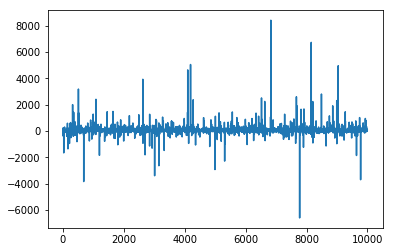

In [18]:
(df['Profit']).plot.line()

# Plotting the Sales and Profit variable

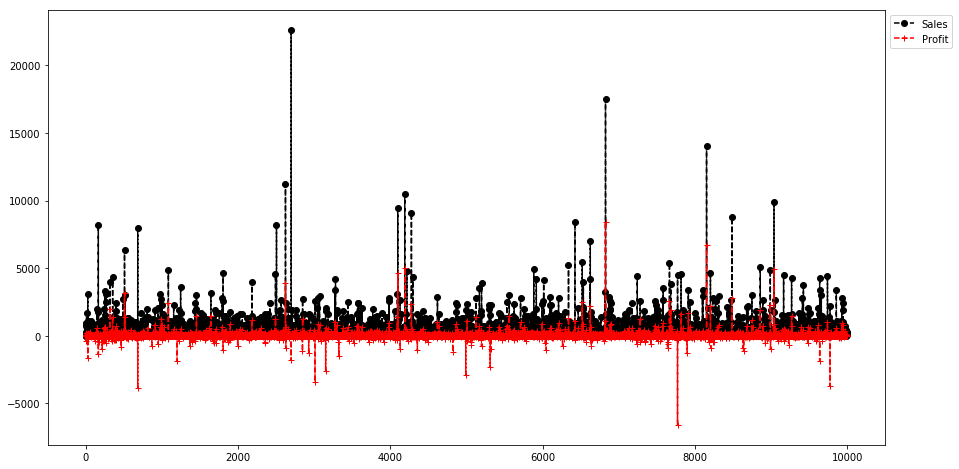

In [22]:
plt.figure(figsize=(15,8))
plt.plot(df['Sales'], data = df, color="black", ls="--", marker="o", ms=6, label="Sales") 
plt.plot(df['Profit'], data = df, color="red", ls="--", marker="+", ms=6, label="Profit")
#plt.plot(df['Quantity'], color="blue", ls="--", marker="s", ms=6, label="Quantity")
#plt.plot(df['Discount'], color="green", ls="--", marker="^", ms=6, label="Discount")
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1)) #to show the labels at proper location
plt.show()


In [34]:
df[df['Profit']==df['Profit'].max()]

Ship Mode    Segment        Country       City    State  \
6826  Standard Class  Corporate  United States  Lafayette  Indiana   

      Postal Code   Region    Category Sub-Category     Sales  Quantity  \
6826        47905  Central  Technology      Copiers  17499.95         5   

      Discount    Profit  
6826       0.0  8399.976

In [36]:
df[df['Sales']==df['Sales'].max()]

Ship Mode      Segment        Country          City    State  \
2697  Standard Class  Home Office  United States  Jacksonville  Florida   

      Postal Code Region    Category Sub-Category     Sales  Quantity  \
2697        32216  South  Technology     Machines  22638.48         6   

      Discount     Profit  
2697       0.5 -1811.0784

#Observation :   From the above figure and code, we can see Sales are higher and are positive, while Profit is does not match the level of Sale. For example: Profit = 8399 is the maximum, while sales is 17499. Also where Sales = 22638 which is highest sales, profit is at negative -1811

# Checking correlation

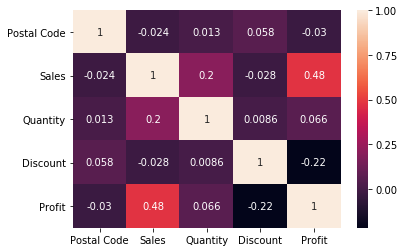

In [22]:
sns.heatmap(df.corr(), annot = True)

# Checking with Outliers

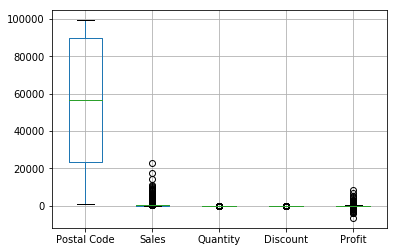

In [23]:
df.boxplot()##Finding outliers
#Sales: It has outliers
#Profit also has outliers

Q1 = np.percentile(df['Sales'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['Sales'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['Sales'], 75, interpolation = 'midpoint') 
IQR = Q3-Q1
print('Interquartile range is', IQR) 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim)
outlier =[] 
for x in df['Sales']: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x) 
print(' outlier in the dataset is', outlier)

Q1 = np.percentile(df['Profit'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['Profit'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['Profit'], 75, interpolation = 'midpoint') 
IQR = Q3-Q1
print('Interquartile range is', IQR) 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim)
outlier =[] 
for x in df['Profit']: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x) 
print(' outlier in the dataset is', outlier)

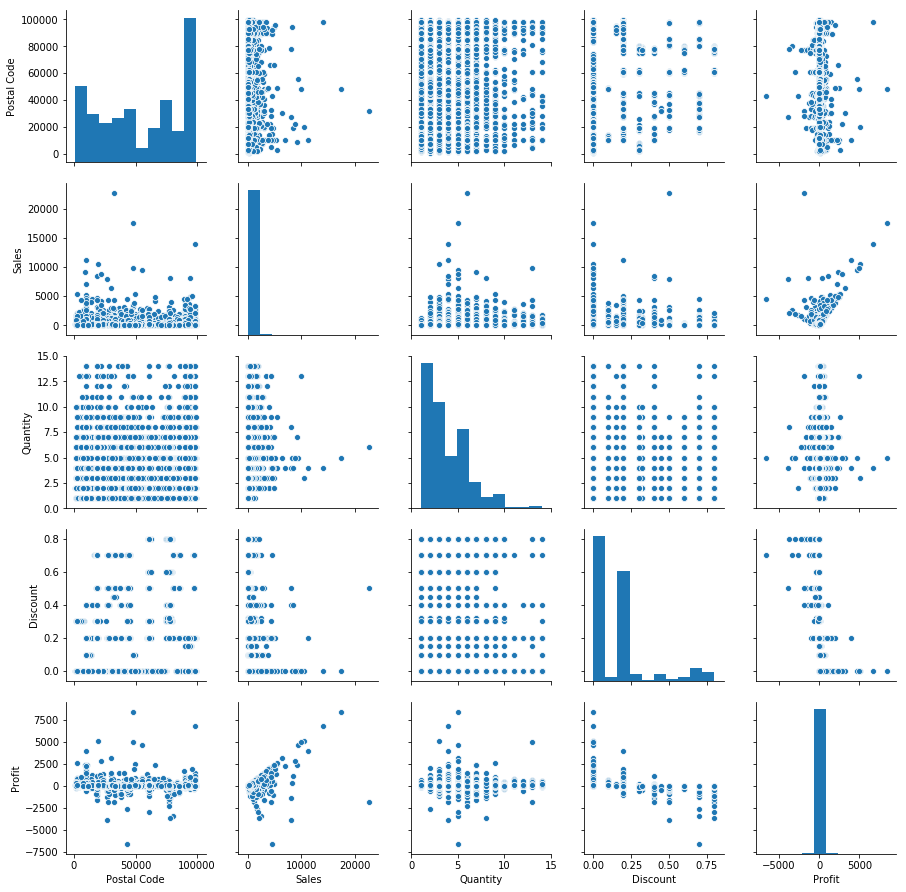

In [28]:
sns.pairplot(df)

# Ship Mode

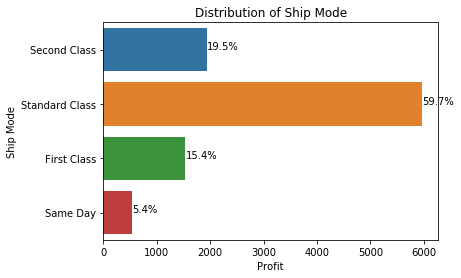

In [129]:
ax = sns.countplot(y="Ship Mode", data=df)
plt.title('Distribution of Ship Mode')
plt.xlabel('Profit'); 
plt.ylabel('Ship Mode'); 

total = len(df['Profit'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [18]:
x = df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

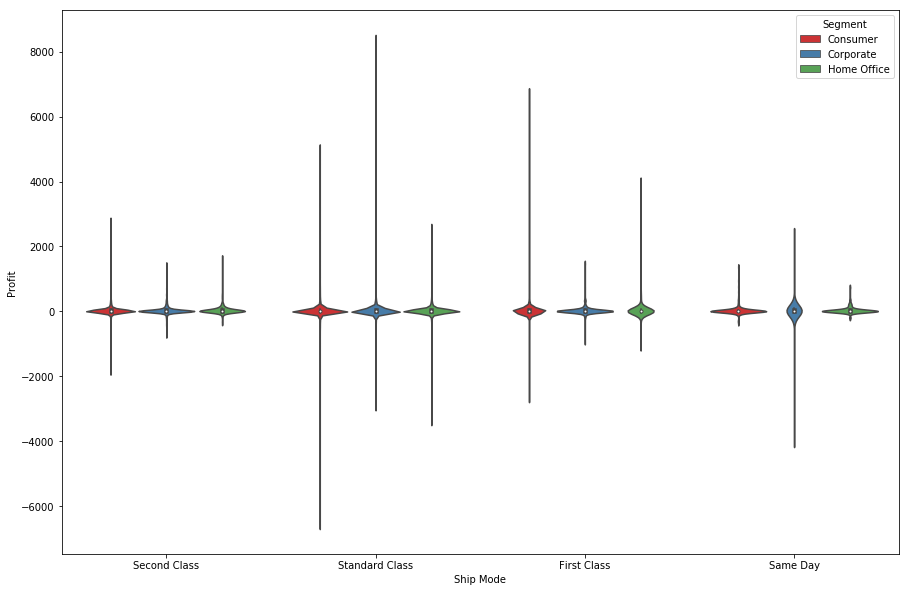

In [32]:
plt.figure(figsize = (15,10))
sns.violinplot(x='Ship Mode', y = 'Profit',  hue = 'Segment', palette='Set1', data = df)

#Observation:
#From above figure we can say the segment 'Corporate' from 'Statndard class' Ship Mode, makes maximum profit

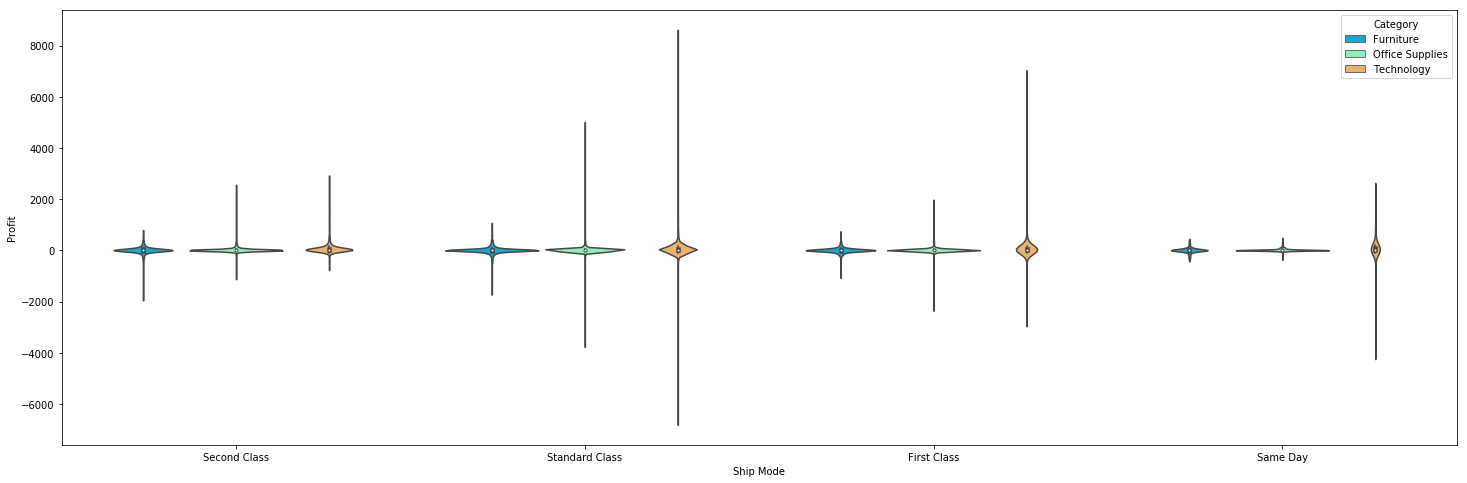

In [39]:
plt.figure(figsize = (25,8))
sns.violinplot(x='Ship Mode', y = 'Profit',  hue = 'Category', palette='rainbow', data = df)

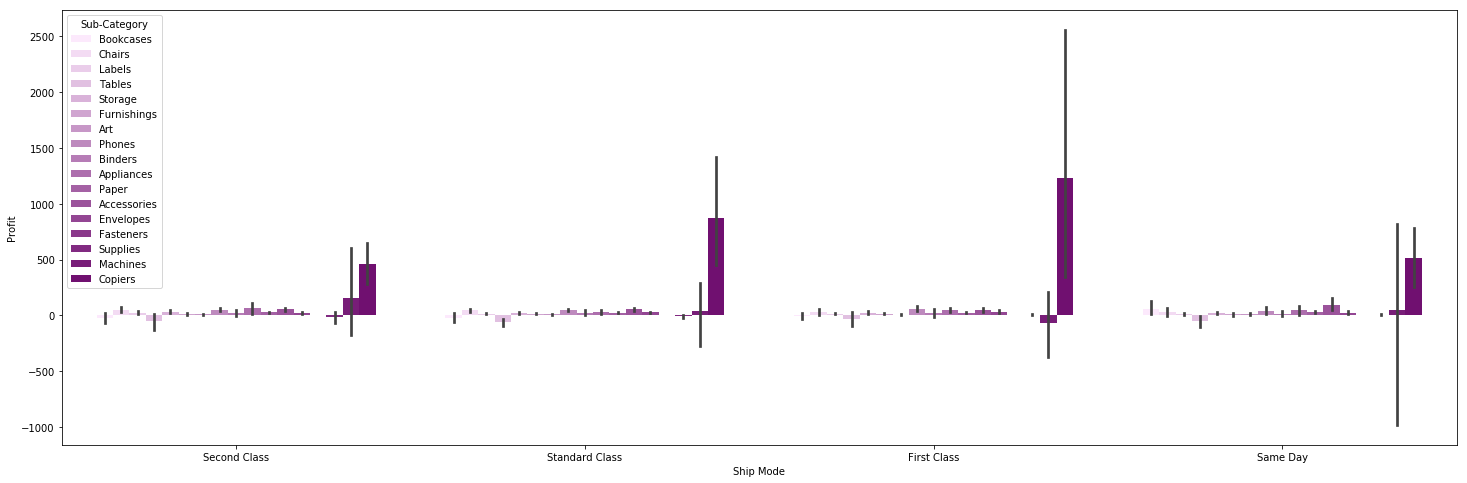

In [4]:
plt.figure(figsize = (25,8))
sns.barplot(x ='Ship Mode', y = 'Profit', hue = 'Sub-Category', data = df, color ='purple') 

In [56]:
table = pd.pivot_table(df, index = ['Category', 'Sub-Category'], columns='Ship Mode', values = 'Profit' ,aggfunc=np.mean)

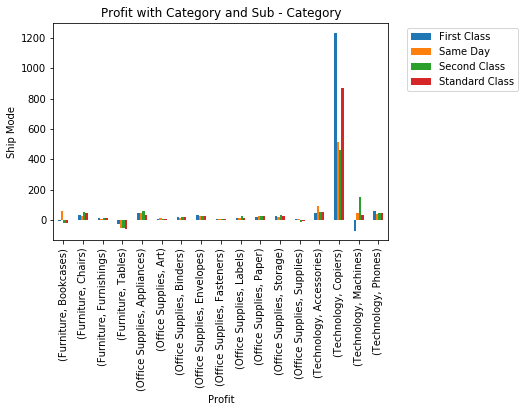

In [60]:
table.plot(kind='bar')
plt.xlabel("Profit")
plt.ylabel("Ship Mode")
plt.title("Profit with Category and Sub - Category")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [61]:
table = pd.pivot_table(df, index = ['Category', 'Sub-Category'], columns='Ship Mode', values = 'Sales' ,aggfunc=np.mean)

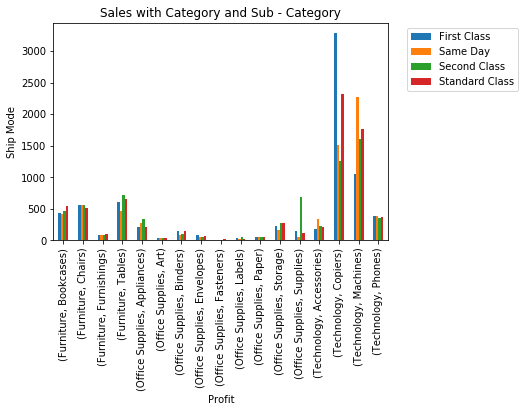

In [62]:
table.plot(kind='bar')
plt.xlabel("Profit")
plt.ylabel("Ship Mode")
plt.title("Sales with Category and Sub - Category")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

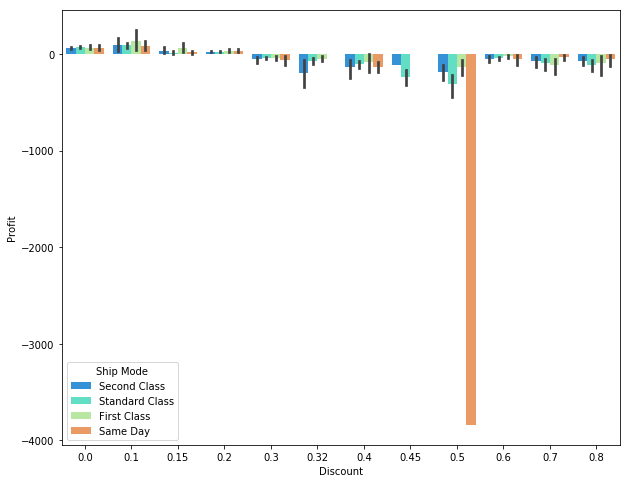

In [79]:
plt.figure(figsize = (10,8))
sns.barplot(x='Discount', y = 'Profit',  hue = 'Ship Mode', palette='rainbow', data = df)

#Observations:
#if the Ship Mode is of same day and dscount is of 0.5, the profit is in negative
#if the discount is 0.0 to .2, the profit is significantly positive with 'First class', 'Second Class'. More the discount more negative the profit.

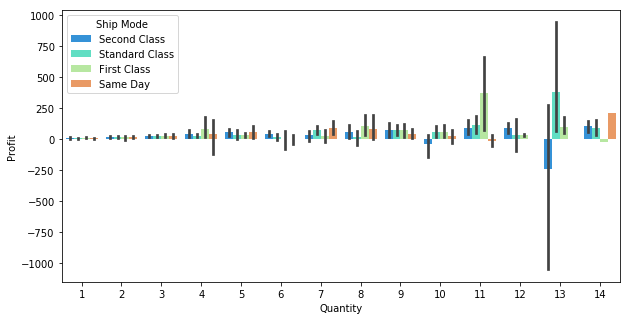

In [93]:
plt.figure(figsize = (10,5))
sns.barplot(x='Quantity', y = 'Profit',  hue = 'Ship Mode', palette='rainbow', data = df)

#Observations:
#With the Quantity of 11 or 13, the Ship mode of Standard class and First class has high profitupto 500.

# Segment


Segment
1. Segment with City, State, Postal Code, Region
2. Segment with  Sales
3. Segment with  Quantity
4. Segment with  Discount
5. Segment with  Profit

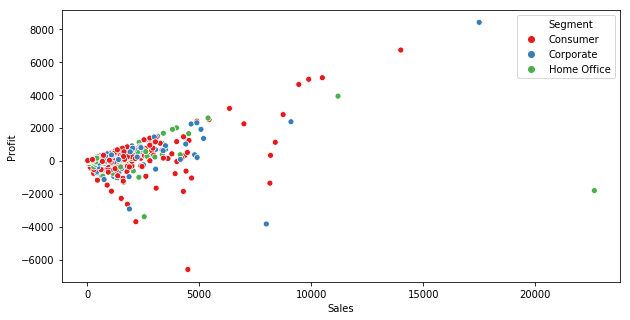

In [98]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='Sales', y = 'Profit',  hue = 'Segment', palette='Set1', data = df)

#Observation :
#With the segment 'COnsumer', 'Corporate' the profit is in postive side and moving upwards.

In [99]:
table = pd.pivot_table(df, index = ['Category', 'Sub-Category'], columns='Segment', values = 'Sales' ,aggfunc=np.mean)

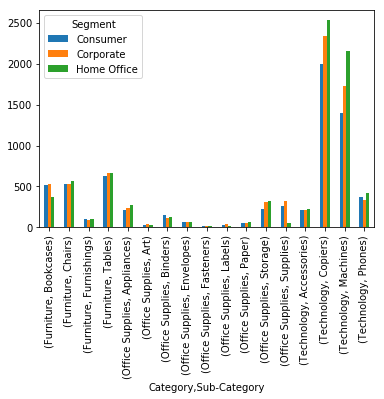

In [100]:
table.plot(kind = 'bar')

In [58]:
#Observations:
#The segment 'Home Office'has higher profit wi th 2500 with category:'Technology' and Sub-Category: 'Copiers'
#The Corporate segment has also has high profit 2300 with category:'Technology' and Sub-Category: 'Copiers'
#The Technology with Machines as a sub-category, the segment: Home office has higher profit with 2000
#Above observation shows that Category: 'Technology' in home office has higher profit.
#Segment: Home office gives more profit.

<Figure size 720x360 with 0 Axes>

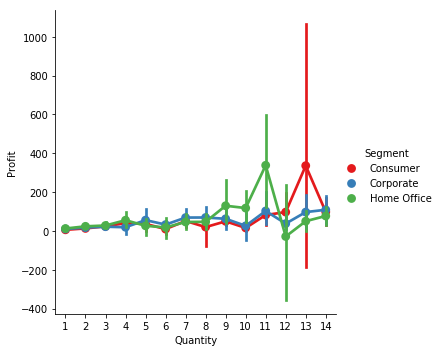

In [107]:
plt.figure(figsize = (10,5))
sns.factorplot(x='Quantity', y = 'Profit',  hue = 'Segment', palette='Set1', data = df)

#Observation:
1. Here the 'Consumer' segment give higher profit if the quantity is high.
2. The profit from 'Home Office' segment  increases gradually with the increase in quantity

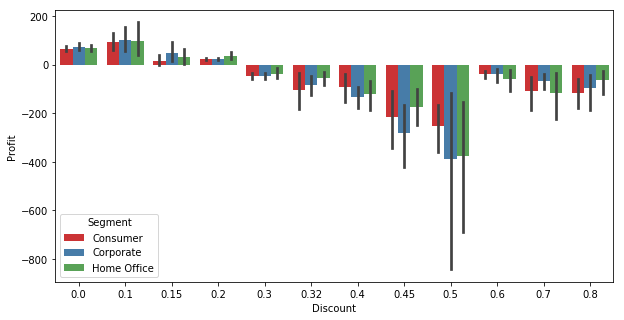

In [110]:
plt.figure(figsize = (10,5))
sns.barplot(x='Discount', y = 'Profit',  hue = 'Segment', palette='Set1', data = df)

##With Discount of 0.0 to 0.2 with segment: 'Consumer', 'Corporate', 'Home Office', the profit is positive.

# 

# 

# 

# Category and Sub category
1. Category and Sub -Category with Sales
2. Category and Sub -Category with Quantity
3. Category and Sub -Category with Discount
4. Category and Sub -Category with Profit
4. Category and Sub -Category with City, State, Postal Code, Region

In [116]:
table = pd.pivot_table(df, index = ['Category', 'Sub-Category'], columns='Quantity', values = 'Sales' ,aggfunc=np.mean)

<Figure size 1296x720 with 0 Axes>

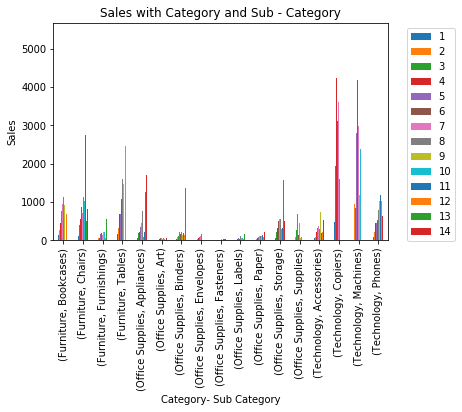

In [122]:
plt.figure(figsize = (18,10))
table.plot(kind='bar')
plt.xlabel("Category- Sub Category")
plt.ylabel("Sales")
plt.title("Sales with Category and Sub - Category")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

##Observation:
#Same observations: Technology -Copiers and Machines with higher quantity have higgher sales

In [124]:
table = pd.pivot_table(df, index = ['Category', 'Sub-Category'], columns='Discount', values = 'Sales' ,aggfunc=np.mean)

<Figure size 2016x1440 with 0 Axes>

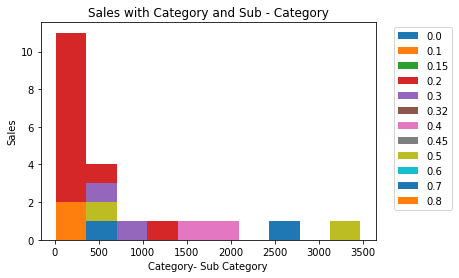

In [128]:
plt.figure(figsize = (28,20))
table.plot(kind='hist')
plt.xlabel("Category- Sub Category")
plt.ylabel("Sales")
plt.title("Sales with Category and Sub - Category")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [142]:
table = pd.pivot_table(df, index = ['Category', 'Sub-Category'], columns='Region', values = 'Profit' ,aggfunc=np.mean)

<Figure size 2016x1440 with 0 Axes>

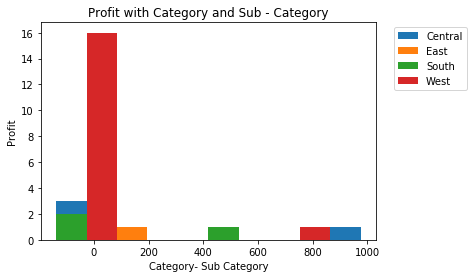

In [143]:
plt.figure(figsize = (28,20))
table.plot(kind='hist')
plt.xlabel("Category- Sub Category")
plt.ylabel("Profit")
plt.title("Profit with Category and Sub - Category")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

##Observations:
West Region has maximim profit

# Sales
1. Sales with Quantity
2. Sales with Discount
3. Sales with Profit
4. Sales with City, State, Postal Code, Region

In [6]:
df['Sales'].max()

22638.48

##Finding the macximum Sales and Profit

In [7]:
df[df['Sales']==df['Sales'].max()]

Ship Mode      Segment        Country          City    State  \
2697  Standard Class  Home Office  United States  Jacksonville  Florida   

      Postal Code Region    Category Sub-Category     Sales  Quantity  \
2697        32216  South  Technology     Machines  22638.48         6   

      Discount     Profit  
2697       0.5 -1811.0784

# Corelating the Sales with Profit

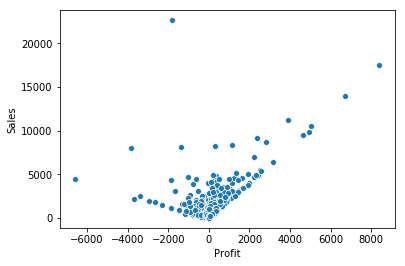

In [11]:
sns.scatterplot(df['Profit'], df['Sales'], data=df)

#Observation:
1. Maximum the sales  (15000) maximum is the profit(8000)
2. Negative is the sale(5000 to 10000), minimum is the Profit.

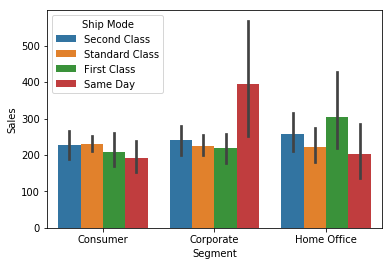

In [12]:
sns.barplot(df['Segment'], df['Sales'], data = df, hue = df['Ship Mode']);

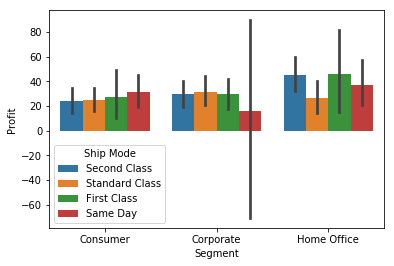

In [19]:
sns.barplot(df['Segment'], df['Profit'], data = df, hue = df['Ship Mode']);

#Observations:
1. Under the segment, Corporate Segment has the maximum Sales

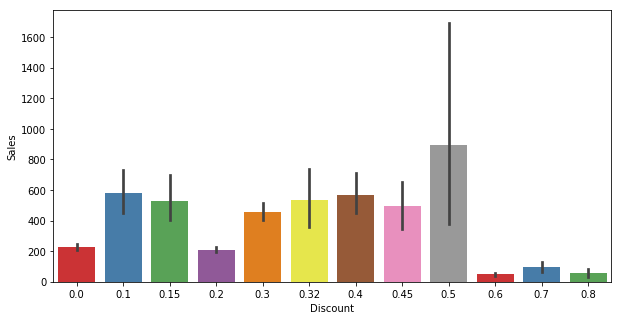

In [145]:
plt.figure(figsize = (10,5))
sns.barplot(x='Discount', y = 'Sales', palette='Set1', data = df)

##Observations:
#Discount with 0.5 has higher sales upto 800

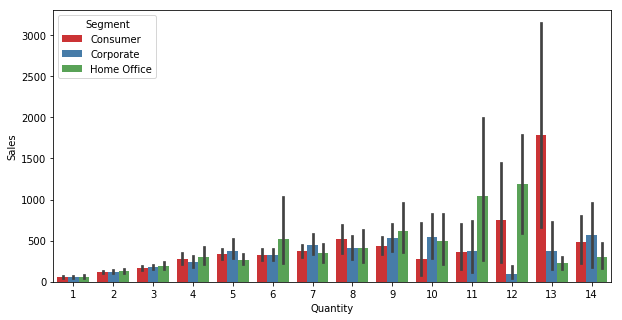

In [147]:
plt.figure(figsize = (10,5))
sns.barplot(x='Quantity', y = 'Sales',hue = 'Segment', palette='Set1', data = df)

##Observation:
13 quantity of products belong to Consumer segment makes higher sales

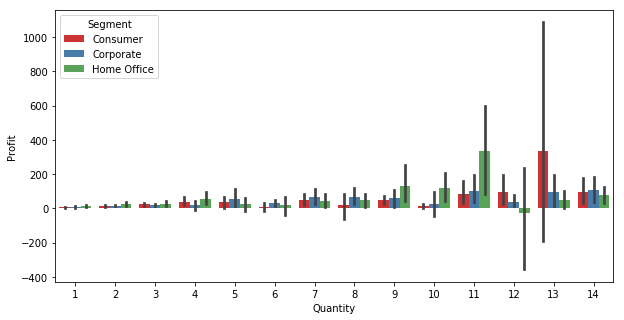

In [18]:
plt.figure(figsize = (10,5))
sns.barplot(x='Quantity', y = 'Profit',hue = 'Segment', palette='Set1', data = df)

In [153]:
table = pd.pivot_table(df, index = ['Category', 'Sub-Category'], columns='State', values = 'Sales' ,aggfunc=np.mean)

<Figure size 2016x1440 with 0 Axes>

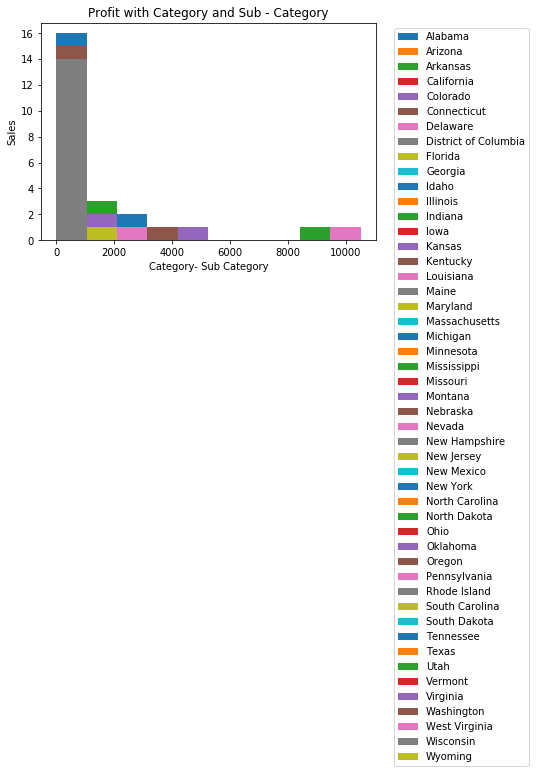

In [154]:
plt.figure(figsize = (28,20))
table.plot(kind='hist')
plt.xlabel("Category- Sub Category")
plt.ylabel("Sales")
plt.title("Profit with Category and Sub - Category")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [23]:
##Rhode island, Connecticut and ALabama has maximum sales

# Quantity
1. Quantity with Discount
2. Quantity with  Profit
3. Quantity with City, State, Postal Code, Region

In [157]:
table = pd.pivot_table(df, index = ['Discount'], columns='Quantity', values = 'Profit' ,aggfunc=np.mean)

<Figure size 2016x1440 with 0 Axes>

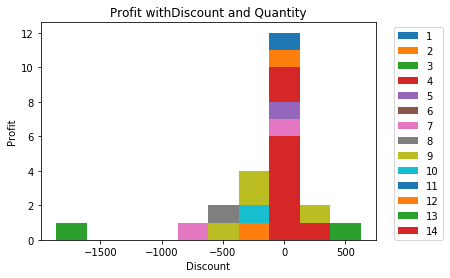

In [159]:
plt.figure(figsize = (28,20))
table.plot(kind='hist')
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Profit withDiscount and Quantity")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

#Observations:
Higher the quantity, lower is the discount higher is the profit

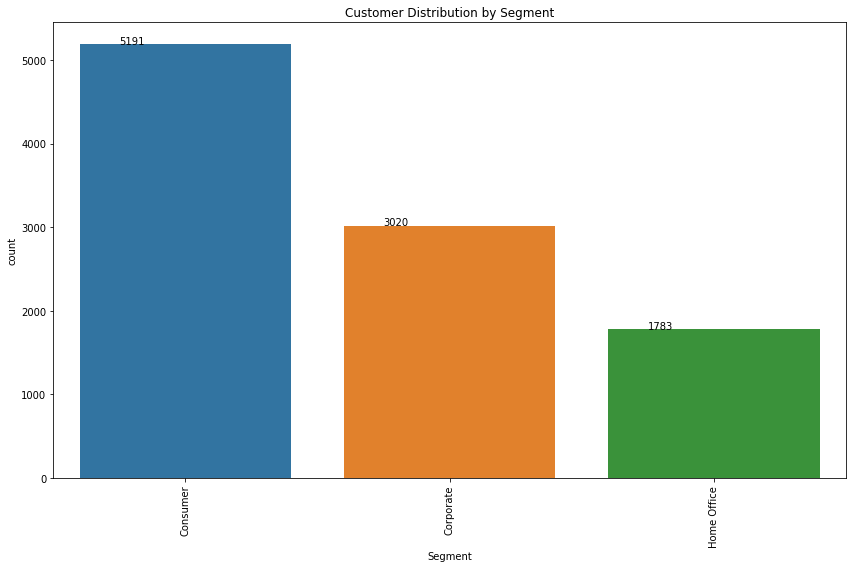

In [24]:
#What is the distribution of our customer segment
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.countplot(x="Segment", data=df, ax=ax)
ax.set_title("Customer Distribution by Segment")
ax.set_xticklabels(p.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.tight_layout()
plt.show()

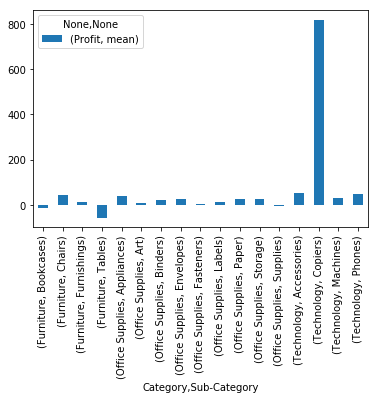

In [29]:
cat = df.groupby(['Category', 'Sub-Category']).agg({'Profit':['mean']}).plot.bar()
cat

# The category of 'Technology' with sub category Copiers has maximum profit

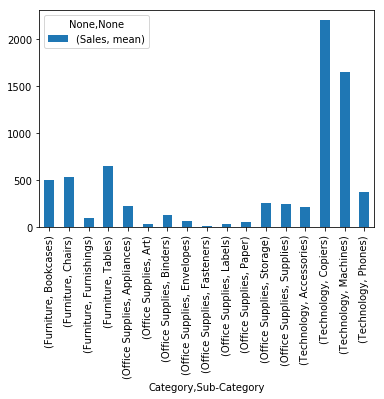

In [24]:
cat = df.groupby(['Category', 'Sub-Category']).agg({'Sales':['mean']},{'Profit':['mean']}).plot.bar()
cat



<Figure size 2160x3240 with 0 Axes>

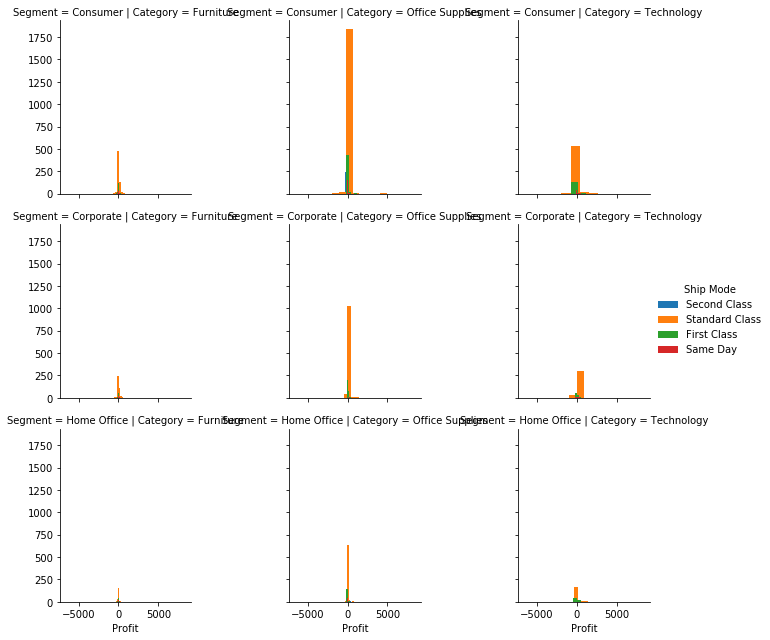

In [29]:
plt.figure(figsize = (30,45))
gp = sns.FacetGrid(df, col = 'Category',row = 'Segment', hue = 'Ship Mode')
gp.map(plt.hist, "Profit").add_legend()

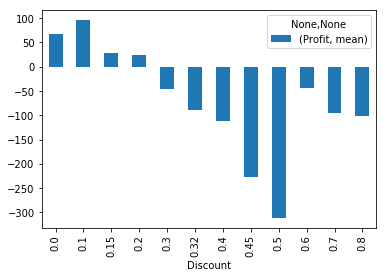

In [44]:
df.groupby(['Discount']).agg({'Profit':['mean']}).plot.bar()

# When the discount is maximum, profit is negative, where when discount  is minimum which 0.0 or 0.1, Profit is postive

In [15]:
df[df['Profit']==df['Profit'].max()]

Ship Mode    Segment        Country       City    State  \
6826  Standard Class  Corporate  United States  Lafayette  Indiana   

      Postal Code   Region    Category Sub-Category     Sales  Quantity  \
6826        47905  Central  Technology      Copiers  17499.95         5   

      Discount    Profit  
6826       0.0  8399.976

In [139]:
df[df['Profit'] == df['Profit'].min()]

Ship Mode   Segment        Country       City State  Postal Code  \
7772  Standard Class  Consumer  United States  Lancaster  Ohio        43130   

     Region    Category Sub-Category     Sales  Quantity  Discount    Profit  
7772   East  Technology     Machines  4499.985         5       0.7 -6599.978

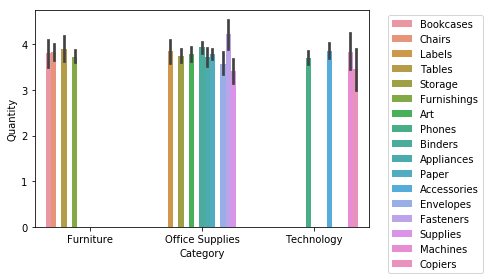

In [163]:
sns.barplot(x = "Category",     # Data is groupedby this variable
            hue="Sub-Category",
            y= "Quantity",          
            data=df)


plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

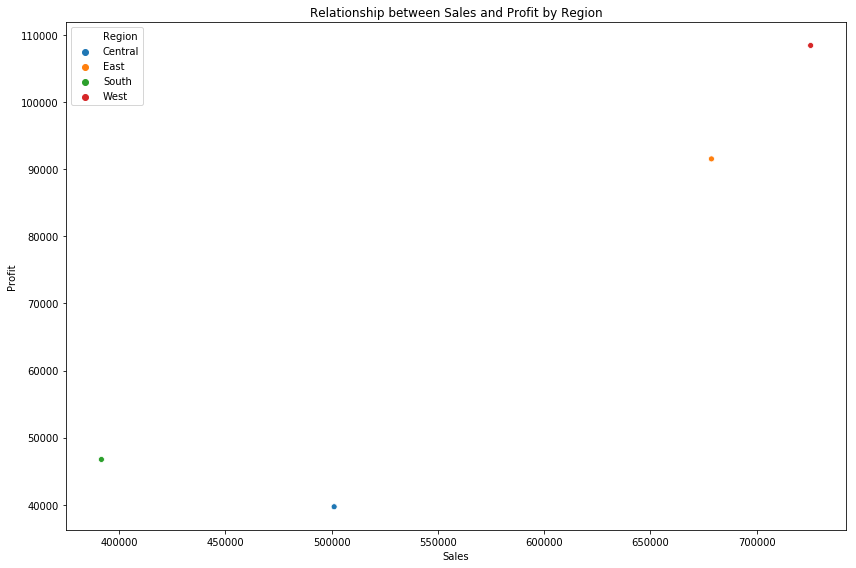

In [150]:
regionwiseSalesAndProfit = df.groupby("Region").agg({"Sales":np.sum, "Profit": np.sum})
regionwiseSalesAndProfit
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.scatterplot(x="Sales", y="Profit", hue=regionwiseSalesAndProfit.index, data=regionwiseSalesAndProfit) # kind="scatter")
ax.set_title("Relationship between Sales and Profit by Region")
plt.tight_layout()
plt.show()

In [16]:
table = pd.pivot_table(df, index = ['Region', 'Category'], columns='Quantity', values = 'Profit',aggfunc=np.mean)

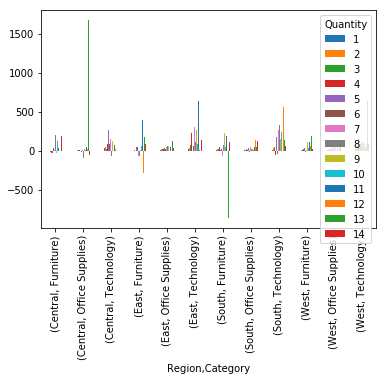

In [17]:
table.plot.bar()

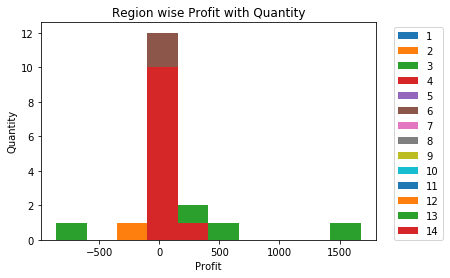

In [217]:
table.plot(kind='hist')
plt.xlabel("Profit")
plt.ylabel("Quantity")
plt.title("Region wise Profit with Quantity")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [9]:
###Sales is highly correlated to profit

# Discount

#Discount with Profit
#Discount with City, State, Postal Code, Region

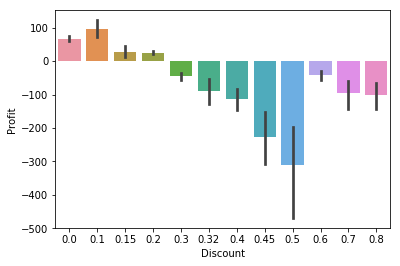

In [6]:
sns.barplot(x = "Discount",     # Data is groupedby this variable
            
            y= "Profit",          
            data=df)

In [11]:
table = pd.pivot_table(df, index = [ 'State', 'City'], columns='Region', values = 'Discount')

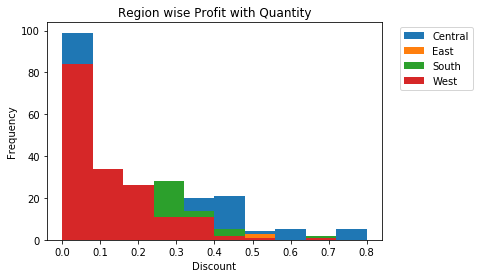

In [16]:
table.plot(kind='hist')
plt.xlabel("Discount")
plt.ylabel("Frequency")
plt.title("Region wise Profit with Quantity")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [20]:
# Observations:
# The west region has maximum discount


# Insights

In [21]:
##Insights:
#The Profit will be more with the Ship mode: 'Standard Class', in the Western region, in the State Indiana in Lafayette in the 
#category 'Technology' and sub category : Copiers, if thw quantity is 13 and discount is kept between 0.0 to 0.2

#If Discount is 0.5, there will be sales but no profit, its a loss.
 

# Thank You..